In [2]:
!pip install scipy

     -------------------------------------- 42.5/42.5 MB 700.5 kB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from sklearn import preprocessing

In [31]:
exp_path = 'Опыты от 18.02.23'
Path = os.getcwd()
Path = f'{Path}/{exp_path}'
signals = pd.read_csv(f'{exp_path}_signal_data.csv',)
signals = signals.fillna(0)
signal_full = signals
d = preprocessing.normalize(signals.loc[:, "0":"1999":1])
signals = pd.DataFrame(d)
signals

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,-0.001963,-0.001009,0.000697,-0.000477,-0.002275,-0.000991,0.000844,-0.000715,-0.002311,-0.000624,...,-0.000972,-0.000569,-0.000569,-0.000440,-0.000349,-0.000605,-0.000917,-0.000752,-0.000293,0.000018
1,-0.002025,-0.000535,0.001223,-0.000439,-0.002273,-0.000382,0.001375,-0.000802,-0.002369,0.000057,...,-0.000974,-0.000649,-0.000592,-0.000535,-0.000516,-0.000630,-0.000783,-0.000726,-0.000401,0.000076
2,0.001944,0.001396,-0.000245,0.000509,0.002038,0.001264,-0.000377,0.000774,0.002057,0.000830,...,-0.000528,-0.000377,-0.000245,-0.000509,-0.000774,-0.000528,-0.000151,-0.000151,-0.000170,0.000170
3,-0.001839,-0.000140,0.001479,-0.000400,-0.002079,0.000060,0.001639,-0.000740,-0.002199,0.000480,...,-0.000979,-0.000700,-0.000580,-0.000560,-0.000580,-0.000620,-0.000620,-0.000600,-0.000360,0.000200
4,-0.001704,-0.001209,0.000330,-0.000403,-0.002015,-0.001228,0.000421,-0.000660,-0.002070,-0.000916,...,-0.000989,-0.000513,-0.000531,-0.000421,-0.000275,-0.000531,-0.000898,-0.000733,-0.000257,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.000365,0.000620,0.000569,0.000992,0.002567,0.003814,0.001874,-0.003332,-0.007110,-0.004638,...,0.001101,0.004652,0.004331,0.001393,0.000817,0.003048,0.003267,-0.000503,-0.003726,-0.002516
296,0.000532,0.000613,0.000642,0.001626,0.003383,0.003434,-0.000328,-0.005629,-0.006832,-0.001509,...,0.003084,0.005112,0.002997,0.000649,0.001750,0.003631,0.001757,-0.002486,-0.003682,-0.001138
297,0.000561,0.000598,0.000692,0.001807,0.003534,0.003236,-0.000882,-0.006034,-0.006566,-0.000743,...,0.003520,0.005058,0.002638,0.000598,0.002019,0.003622,0.001253,-0.002908,-0.003556,-0.000882
298,0.000605,0.000569,0.000831,0.002238,0.003769,0.002544,-0.002304,-0.006801,-0.005591,0.001181,...,0.004315,0.004716,0.001873,0.000693,0.002668,0.003412,0.000058,-0.003616,-0.003018,-0.000335


In [32]:
SAMPLE_RATE = 2*10**6  # Гц
DURATION = 1000*10**-6  # Секунды
one_signal = signals[:1]
one_signal = one_signal.loc[:, "0":"1999":1]
one_signal

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,-0.001963,-0.001009,0.000697,-0.000477,-0.002275,-0.000991,0.000844,-0.000715,-0.002311,-0.000624,...,-0.000972,-0.000569,-0.000569,-0.00044,-0.000349,-0.000605,-0.000917,-0.000752,-0.000293,0.000018


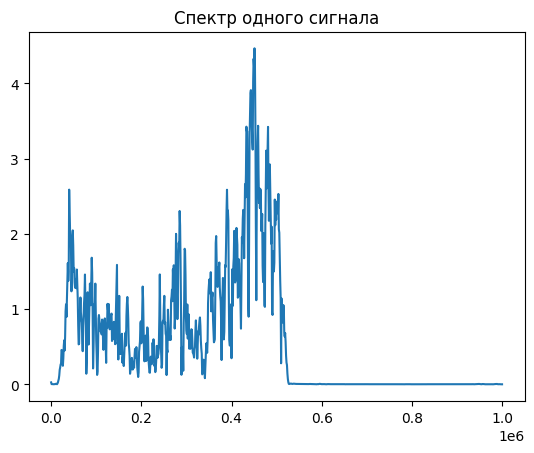

In [33]:
N = SAMPLE_RATE * DURATION
yf = rfft(one_signal)
xf = rfftfreq(int(N), 1/float(SAMPLE_RATE))
plt.plot(xf, np.abs(yf[0]))
plt.title('Спектр одного сигнала')
plt.show()

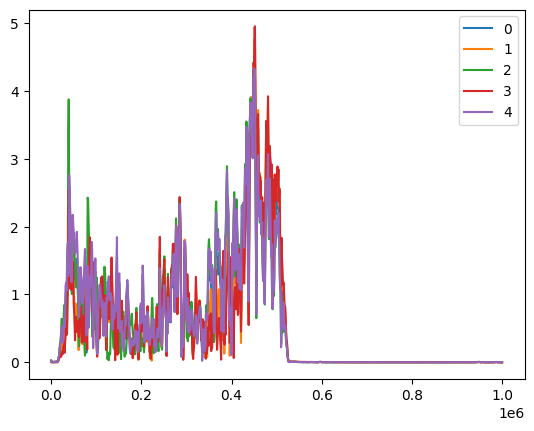

In [34]:
SAMPLE_RATE = 2*10**6  # Гц
DURATION = 1000*10**-6  # Секунды
signal_ch1_0_1 = signals[:5]
signal_ch1_0_1 = signal_ch1_0_1.loc[:, "0":"1999":1]
index_signal = signal_ch1_0_1.index
for i in range(len(signal_ch1_0_1)):
    N = SAMPLE_RATE * DURATION
    yf = rfft((pd.DataFrame(signal_ch1_0_1.iloc[index_signal[i]]).T))
    xf = rfftfreq(int(N), 1/float(SAMPLE_RATE))
    plt.plot(xf, np.abs(yf[0]))
plt.legend(index_signal)
plt.show()

In [35]:
sig = signal_full[signal_full["num_exp"].str.contains("_0,1")]
sig

,channel,num_exp,count_dot,0,1,2,3,4,5,6,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,ch1,"1_0,1",2000.0,-107.0,-55.0,38.0,-26.0,-124.0,-54.0,46.0,...,-53.0,-31.0,-31.0,-24.0,-19.0,-33.0,-50.0,-41.0,-16.0,1.0
1,ch1,"1_0,1",2000.0,-106.0,-28.0,64.0,-23.0,-119.0,-20.0,72.0,...,-51.0,-34.0,-31.0,-28.0,-27.0,-33.0,-41.0,-38.0,-21.0,4.0
2,ch1,"1_0,1",2000.0,103.0,74.0,-13.0,27.0,108.0,67.0,-20.0,...,-28.0,-20.0,-13.0,-27.0,-41.0,-28.0,-8.0,-8.0,-9.0,9.0
3,ch1,"1_0,1",2000.0,-92.0,-7.0,74.0,-20.0,-104.0,3.0,82.0,...,-49.0,-35.0,-29.0,-28.0,-29.0,-31.0,-31.0,-30.0,-18.0,10.0
4,ch1,"1_0,1",2000.0,-93.0,-66.0,18.0,-22.0,-110.0,-67.0,23.0,...,-54.0,-28.0,-29.0,-23.0,-15.0,-29.0,-49.0,-40.0,-14.0,0.0
50,ch1,"2_0,1",2000.0,51.0,30.0,6.0,37.0,65.0,29.0,2.0,...,3.0,4.0,2.0,-2.0,-3.0,-1.0,0.0,1.0,0.0,-1.0
51,ch1,"2_0,1",2000.0,-52.0,-25.0,44.0,3.0,-78.0,0.0,140.0,...,-2.0,-1.0,2.0,3.0,1.0,-2.0,-1.0,3.0,3.0,1.0
52,ch1,"2_0,1",2000.0,50.0,11.0,-17.0,32.0,59.0,4.0,-17.0,...,1.0,-2.0,-3.0,1.0,5.0,5.0,0.0,-3.0,-3.0,-1.0
53,ch1,"2_0,1",2000.0,52.0,41.0,12.0,31.0,65.0,38.0,-2.0,...,-2.0,0.0,3.0,2.0,1.0,1.0,1.0,0.0,-1.0,0.0
54,ch1,"2_0,1",2000.0,46.0,19.0,12.0,47.0,53.0,10.0,13.0,...,0.0,0.0,-1.0,1.0,3.0,3.0,0.0,-1.0,1.0,3.0


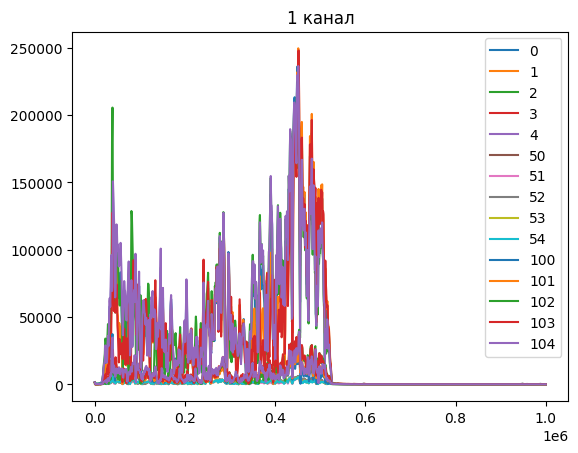

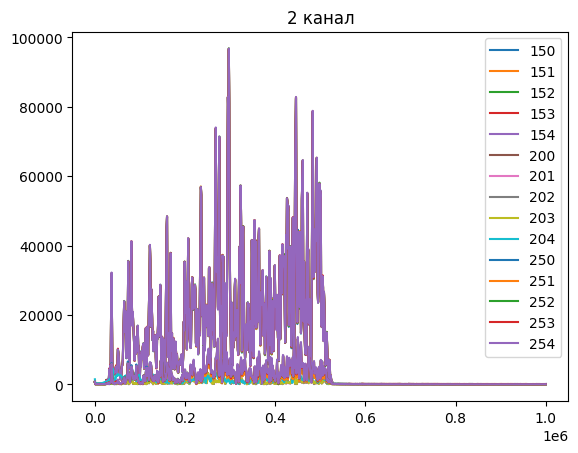

In [36]:
SAMPLE_RATE = 2*10**6  # Гц
DURATION = 1000*10**-6  # Секунды
one_signal = sig
ch1 = one_signal[one_signal['channel']=='ch1']
ch2 = one_signal[one_signal['channel']=='ch2']
ch1 = ch1.loc[:, "0":"1999":1]
ch2 = ch2.loc[:, "0":"1999":1]
index_ch1 = ch1.index
index_ch2 = ch2.index
for i in range(len(ch1)):
    N = SAMPLE_RATE * DURATION
    yf = rfft((pd.DataFrame(ch1.iloc[i]).T))
    xf = rfftfreq(int(N), 1/float(SAMPLE_RATE))
    plt.plot(xf, np.abs(yf[0]))
plt.title('1 канал')
plt.legend(index_ch1)
plt.show()
for i in range(len(ch2)):
    N = SAMPLE_RATE * DURATION
    yf = rfft((pd.DataFrame(ch2.iloc[i]).T))
    xf = rfftfreq(int(N), 1/float(SAMPLE_RATE))
    plt.plot(xf, np.abs(yf[0]))
plt.title('2 канал')
plt.legend(index_ch2)
plt.show()